In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from   PIL import Image
from   torch.utils import data
from   torchvision import transforms
%matplotlib inline

##### 自定义数据集

In [2]:
all_imgs_path   = glob.glob(r"./data/dataset2/*.jpg")      # 返回所有以jpg结尾的文件的路径
species         = ['cloudy','rain','shine','sunrise']      # 定义类别列表
species_to_idx  = dict((v,k) for k,v in enumerate(species))# 将类别数值化
idx_to_species  = dict((k,v) for k,v in enumerate(species))# 将数字映射到类别
all_lables      = []                                       # 保存所有图片的标签

In [3]:
for img in all_imgs_path:         # 对每一个路经对应的图片
    for i,c in enumerate(species):# 考察其可能的种类
        if c in img:              # 当图像类别确定下来后
            all_lables.append(i)  # 令all_labels[<图片在文件夹中的序号>]=图像对应的类别

In [4]:
transform = transforms.Compose([
    transforms.Resize((96,96)),
    transforms.ToTensor(),
     transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
])

In [5]:
class MyDataSet(data.Dataset):
    
    def __init__(self,img_paths,labels,transform):
        self.imgs       = img_paths
        self.labels     = labels
        self.transforms = transform
    
    def __getitem__(self,index):
        img             = self.imgs[index]        #获取图像路径
        label           = self.labels[index]      #获取图像对应的标签
        pil_img         = Image.open(img)         #获得图像对象
        data            = self.transforms(pil_img)#将图像对象转化为数字形式
        return data,label                         #返回图像数据以及对应标签
    
    def __len__(self):
        return len(self.imgs)                     #返回数据数量  

In [6]:
BATCH_SIZE         = 16
weather_dataset    = MyDataSet(all_imgs_path,all_lables,transform)
weather_dataloader = data.DataLoader(
                     weather_dataset,
                     batch_size = BATCH_SIZE,
                     shuffle    = True
)

##### 绘制图像

In [7]:
imgs_batch,labels_batch = next(iter(weather_dataloader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


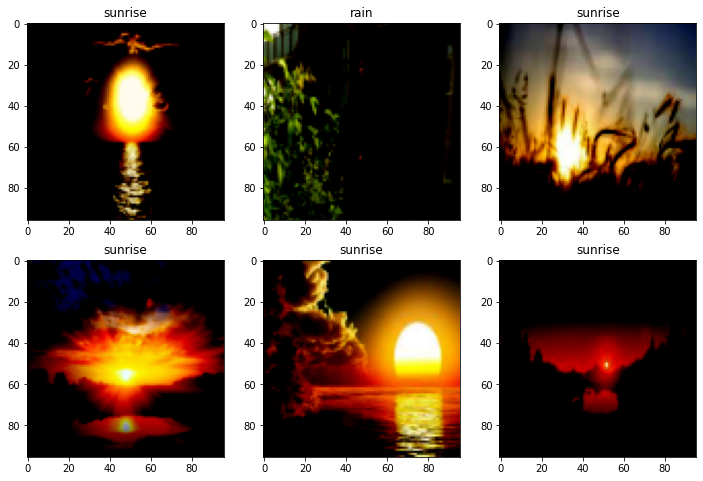

In [8]:
plt.figure(figsize=(12,8))
for i,(img,label) in enumerate(zip(imgs_batch[:6],labels_batch[:6])):
    img = img.permute(1,2,0)   # 交换图像维度 满足PIL绘图条件
    img = img.numpy()          # 将图像转换为numpy()
    plt.subplot(2,3,i+1)       # 在 2X3 的网格里面绘制图像
    plt.title(idx_to_species.get(label.item()))    # 获取标签
    plt.imshow(img)